In [1]:
%load_ext google.cloud.bigquery
%matplotlib inline
from google.cloud import bigquery
client = bigquery.Client()
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import cluster
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import random
from sklearn.cluster import KMeans
import matplotlib.cm as cm
%run silhouette_plotter.py
%run parse.py
from mpl_toolkits.mplot3d import Axes3D

In [2]:
sql = '''
SELECT *  FROM `eth-tokens.test.clean_avg_1MM_with_balances_tokens`
'''

df = client.query(sql).to_dataframe()

In [3]:
#remove address (string) from analysis
data = df.iloc[:,1:]

In [20]:
data = data.apply(pd.to_numeric) 

outgoing_txns


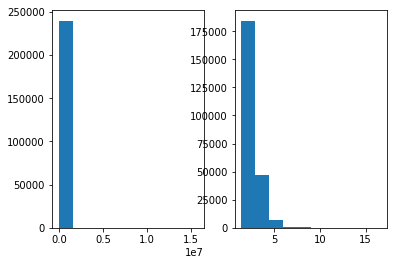

incoming_txns


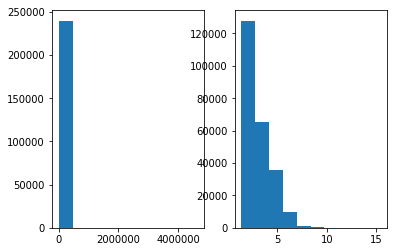

total_eth_sent


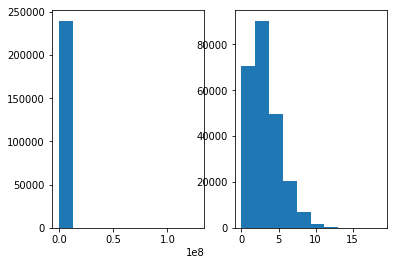

avg_eth_sent


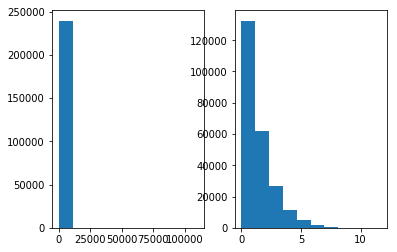

total_usd_sent


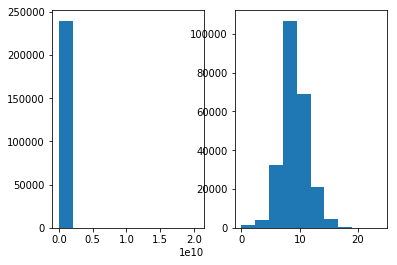

avg_usd_sent


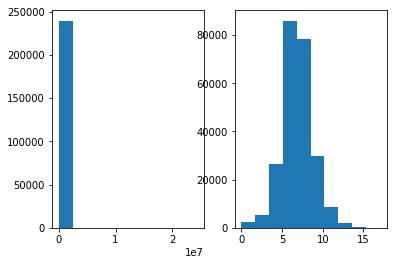

total_eth_recd


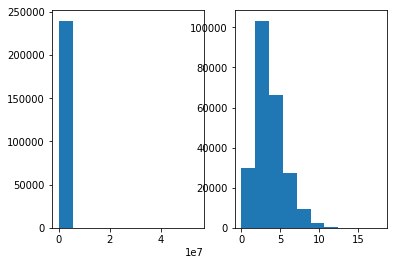

avg_eth_recd


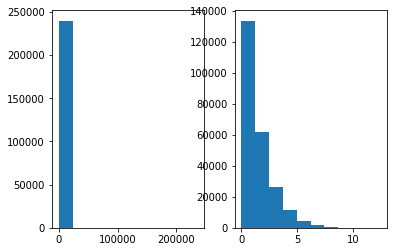

total_usd_recd


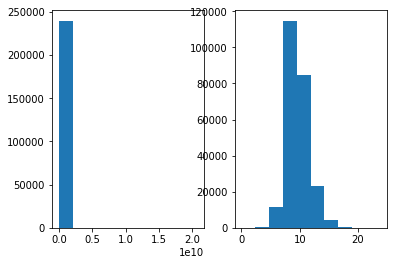

avg_usd_recd


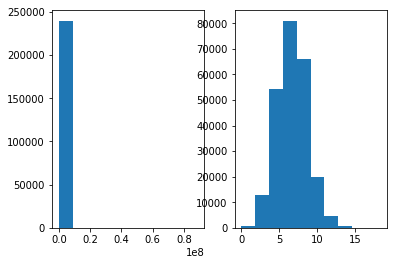

active_months


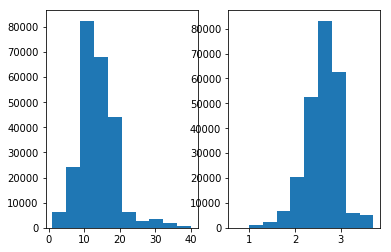

monthly_outgoing_txns


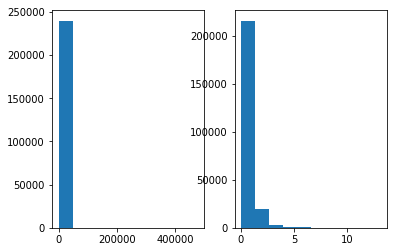

monthly_incoming_txns


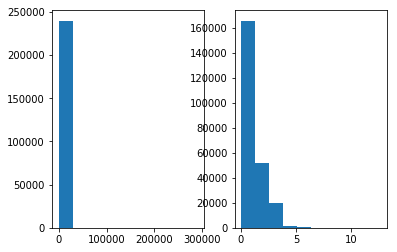

monthly_eth_sent


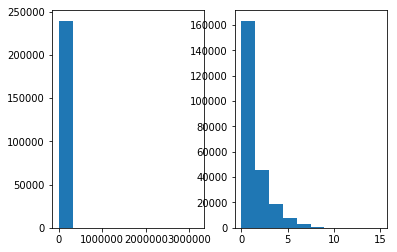

monthly_usd_sent


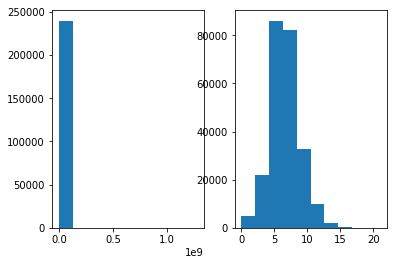

monthly_eth_recd


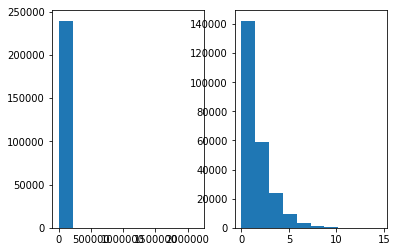

monthly_usd_recd


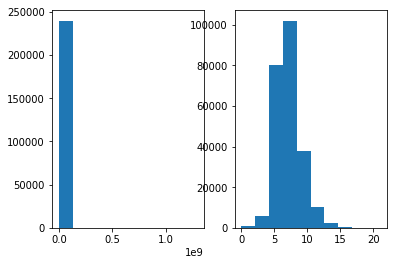

contracts_created


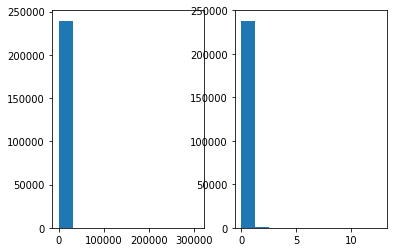

contract_txns_sent


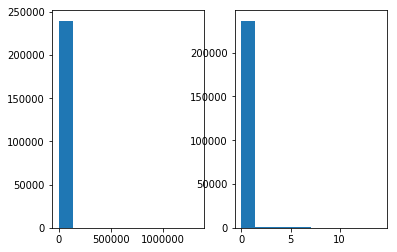

incoming_avg_time_btwn_txns


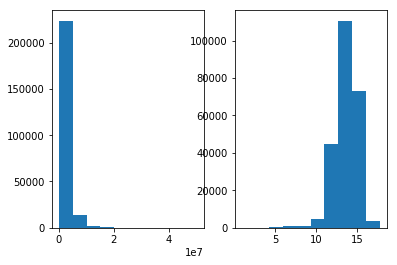

incoming_std_time_btwn_txns


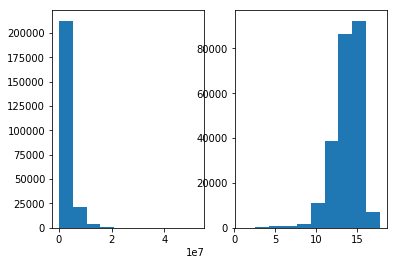

outgoing_avg_time_btwn_txns


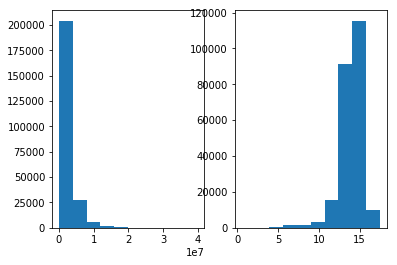

outgoing_std_time_btwn_txns


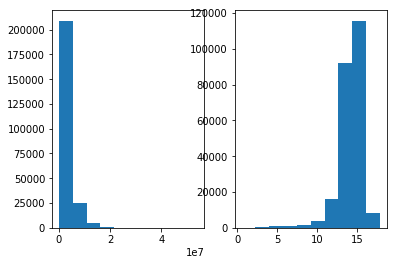

num_tokens_used


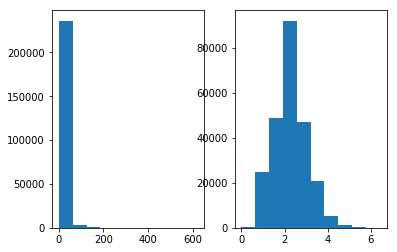

eth_balance


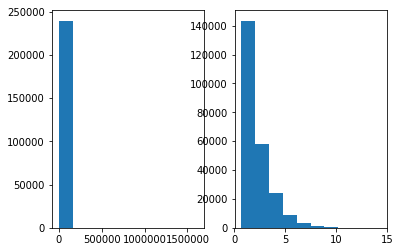

In [23]:
for feat in data.columns:
    print(feat)
    fig, (ax1, ax2) = plt.subplots(1,2)
    ax1.hist(data[feat])
    ax2.hist(np.log1p(data[feat]))
    plt.show()

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239630 entries, 0 to 239629
Data columns (total 25 columns):
outgoing_txns                  239630 non-null int64
incoming_txns                  239630 non-null int64
total_eth_sent                 239630 non-null float64
avg_eth_sent                   239630 non-null float64
total_usd_sent                 239630 non-null float64
avg_usd_sent                   239630 non-null float64
total_eth_recd                 239630 non-null float64
avg_eth_recd                   239630 non-null float64
total_usd_recd                 239630 non-null float64
avg_usd_recd                   239630 non-null float64
active_months                  239630 non-null int64
monthly_outgoing_txns          239630 non-null float64
monthly_incoming_txns          239630 non-null float64
monthly_eth_sent               239630 non-null float64
monthly_usd_sent               239630 non-null float64
monthly_eth_recd               239630 non-null float64
monthly_usd_rec